<a href="https://colab.research.google.com/github/r-prateek/Bird-Species-Classifier/blob/main/Birds95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d gpiosenka/100-bird-species
! unzip 100-bird-species.zip -d dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
train_path = "/content/dataset/train"
test_path = "/content/dataset/test"

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
)

In [15]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (300, 300),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 35215 images belonging to 250 classes.


In [16]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (300, 300),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 1250 images belonging to 250 classes.


In [17]:
resnet = tf.keras.applications.ResNet152V2( 
    include_top = False,
    weights = 'imagenet',
    input_shape = (300, 300, 3)
)

In [ ]:
resnet.trainable = False
resnet.summary()

In [20]:
model = tf.keras.Sequential()

In [21]:
model.add(resnet)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.33))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='softmax'))

In [ ]:
model.summary()

In [24]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(train_data, validation_data=test_data, epochs = 50)

Epoch 1/50
1101/1101 [==============================] - 260s 236ms/step - loss: 2.9853 - accuracy: 0.3070 - val_loss: 1.2140 - val_accuracy: 0.6456
Epoch 2/50
1101/1101 [==============================] - 256s 233ms/step - loss: 1.7659 - accuracy: 0.5277 - val_loss: 0.8516 - val_accuracy: 0.7280
Epoch 3/50
1101/1101 [==============================] - 257s 233ms/step - loss: 1.4603 - accuracy: 0.6010 - val_loss: 0.7016 - val_accuracy: 0.7968
Epoch 4/50
1101/1101 [==============================] - 256s 233ms/step - loss: 1.2805 - accuracy: 0.6476 - val_loss: 0.5795 - val_accuracy: 0.8240
Epoch 5/50
1101/1101 [==============================] - 256s 233ms/step - loss: 1.1518 - accuracy: 0.6818 - val_loss: 0.4705 - val_accuracy: 0.8552
Epoch 6/50
1101/1101 [==============================] - 256s 233ms/step - loss: 1.0639 - accuracy: 0.7049 - val_loss: 0.4826 - val_accuracy: 0.8520
Epoch 7/50
1101/1101 [==============================] - 256s 233ms/step - loss: 1.0095 - accuracy: 0.7198 - val_

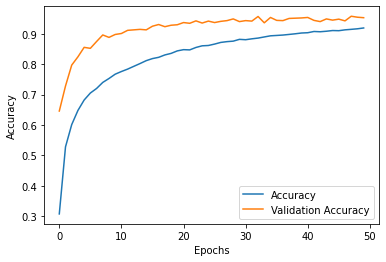

In [27]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

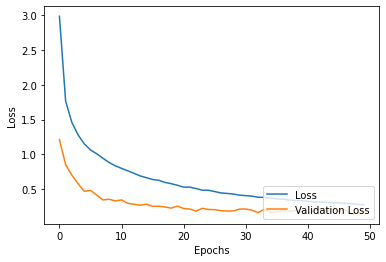

In [28]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "lower right")

In [29]:
model.save('birds3.h5')